In [117]:
import numpy as np
import matplotlib.pyplot as plt

### Read data from log files generated by ns-3

In [118]:
t_idx = 0
energy_idx = 1
pwr_idx = 2
temp_idx = 3
rel_idx = 4
def read_file(filename):
    trace = []
    pwr_all = []
    with open(filename, 'r') as f:
        lines = f.readlines()
        prev_time, prev_energy = 0.0, 0.0
        for line in lines:
            data = line.strip().split(',')
            trace.append([float(d) for d in data])
            
            # calculate total power with wifi by differentiating energy
            cur_time = float(data[0])
            cur_energy = float(data[1])
            if cur_time - prev_time > 0:
                # print(cur_energy, cur_time)
                pwr_w_wifi = (cur_energy - prev_energy) / (cur_time - prev_time)
                pwr_all.append(pwr_w_wifi)
            prev_time = cur_time
            prev_energy = cur_energy
                
    trace = np.array(trace)
    pwr_all = np.array(pwr_all)
    print('Data from file', filename)
    print('power (W) avg. {} max. {} min. {}'.format(np.mean(trace[:, pwr_idx]), \
          np.max(trace[:, pwr_idx]), np.min(trace[:, pwr_idx])))
    print('temp (Celsius) avg. {} max. {} min. {}'.format(np.mean(trace[:, temp_idx]), \
          np.max(trace[:, temp_idx]), np.min(trace[:, temp_idx])))
    print('power w/ wifi (W) avg. {} max. {} min. {}'.format(np.mean(pwr_all), \
          np.max(pwr_all), np.min(pwr_all)))
    
    total_energy = trace[-1, energy_idx]
    total_time = trace[-1, t_idx]
    print('Total energy: {}, total time: {}, avg. power: {}\n'.format(total_energy, total_time, \
                                                                    total_energy/total_time))
    return trace

In [119]:
# read simulation data of scenario 1
rpi01 = read_file('./s1/rpi01.txt')
rpi02 = read_file('./s1/rpi02.txt')
rpi03 = read_file('./s1/rpi03.txt')
rpi04 = read_file('./s1/rpi04.txt')
rpi31 = read_file('./s1/rpi31.txt')
rpi32 = read_file('./s1/rpi32.txt')
print(rpi01[:, t_idx].shape)
rel_rpi01_s1 = rpi01[:, rel_idx]
rel_rpi0s_s1 = np.vstack((rpi02[:, rel_idx], rpi03[:, rel_idx], rpi04[:, rel_idx]))
rel_rpi0s_s1 = np.mean(rel_rpi0s_s1, axis=0)

Data from file ./s1/rpi01.txt
power (W) avg. 1.1873989071038251 max. 1.304 min. 0.85
temp (Celsius) avg. 46.707199043715846 max. 47.3277 min. 25.0
power w/ wifi (W) avg. 9.93969904240766 max. 13.903999999999996 min. 0.0
Total energy: 3632.96, total time: 365.5, avg. power: 9.93969904240766

Data from file ./s1/rpi02.txt
power (W) avg. 0.8499999999999998 max. 0.85 min. 0.85
temp (Celsius) avg. 25.0 max. 25.0 min. 25.0
power w/ wifi (W) avg. 0.7115813953488372 max. 2.64642 min. 0.0
Total energy: 260.083, total time: 365.5, avg. power: 0.7115813953488372

Data from file ./s1/rpi03.txt
power (W) avg. 0.8499999999999998 max. 0.85 min. 0.85
temp (Celsius) avg. 25.0 max. 25.0 min. 25.0
power w/ wifi (W) avg. 0.7444514363885089 max. 2.42854 min. 0.0
Total energy: 272.097, total time: 365.5, avg. power: 0.7444514363885089

Data from file ./s1/rpi04.txt
power (W) avg. 0.8499999999999998 max. 0.85 min. 0.85
temp (Celsius) avg. 25.0 max. 25.0 min. 25.0
power w/ wifi (W) avg. 0.8006429548563612 max

In [120]:
# read simulation data of scenario 2
rpi01 = read_file('./s2/rpi01.txt')
rpi02 = read_file('./s2/rpi02.txt')
rpi03 = read_file('./s2/rpi03.txt')
rpi04 = read_file('./s2/rpi04.txt')
rpi31 = read_file('./s2/rpi31.txt')
rpi32 = read_file('./s2/rpi32.txt')
rel_rpi01_s2 = rpi01[:, rel_idx]
rel_rpi0s_s2 = np.vstack((rpi02[:, rel_idx], rpi03[:, rel_idx], rpi04[:, rel_idx]))
rel_rpi0s_s2 = np.mean(rel_rpi0s_s2, axis=0)

Data from file ./s2/rpi01.txt
power (W) avg. 1.1873989071038251 max. 1.304 min. 0.85
temp (Celsius) avg. 201.3246256830601 max. 202.671 min. 25.0
power w/ wifi (W) avg. 9.93969904240766 max. 13.903999999999996 min. 0.0
Total energy: 3632.96, total time: 365.5, avg. power: 9.93969904240766

Data from file ./s2/rpi02.txt
power (W) avg. 0.8499999999999998 max. 0.85 min. 0.85
temp (Celsius) avg. 25.0 max. 25.0 min. 25.0
power w/ wifi (W) avg. 0.7115813953488372 max. 2.64642 min. 0.0
Total energy: 260.083, total time: 365.5, avg. power: 0.7115813953488372

Data from file ./s2/rpi03.txt
power (W) avg. 0.8499999999999998 max. 0.85 min. 0.85
temp (Celsius) avg. 25.0 max. 25.0 min. 25.0
power w/ wifi (W) avg. 0.7444514363885089 max. 2.42854 min. 0.0
Total energy: 272.097, total time: 365.5, avg. power: 0.7444514363885089

Data from file ./s2/rpi04.txt
power (W) avg. 0.8499999999999998 max. 0.85 min. 0.85
temp (Celsius) avg. 25.0 max. 25.0 min. 25.0
power w/ wifi (W) avg. 0.8006429548563612 max.

In [121]:
# read simulation data of scenario 3
rpi01 = read_file('./s3/rpi01.txt')
rpi02 = read_file('./s3/rpi02.txt')
rpi03 = read_file('./s3/rpi03.txt')
rpi04 = read_file('./s3/rpi04.txt')
rpi31 = read_file('./s3/rpi31.txt')
rpi32 = read_file('./s3/rpi32.txt')
rel_rpi01_s3 = rpi01[:, rel_idx]
rel_rpi0s_s3 = np.vstack((rpi02[:, rel_idx], rpi03[:, rel_idx], rpi04[:, rel_idx]))
rel_rpi0s_s3 = np.mean(rel_rpi0s_s3, axis=0)

Data from file ./s3/rpi01.txt
power (W) avg. 0.8499999999999998 max. 0.85 min. 0.85
temp (Celsius) avg. 25.0 max. 25.0 min. 25.0
power w/ wifi (W) avg. 0.4865581395348837 max. 2.3321 min. 0.0
Total energy: 177.837, total time: 365.5, avg. power: 0.4865581395348837

Data from file ./s3/rpi02.txt
power (W) avg. 1.101814289617486 max. 1.30401 min. 0.85
temp (Celsius) avg. 46.34270942622951 max. 47.3278 min. 25.0
power w/ wifi (W) avg. 8.018030095759235 max. 11.387999999999977 min. 0.0
Total energy: 2930.59, total time: 365.5, avg. power: 8.018030095759235

Data from file ./s3/rpi03.txt
power (W) avg. 1.117320095628415 max. 1.30401 min. 0.85
temp (Celsius) avg. 46.417477049180334 max. 47.3278 min. 25.0
power w/ wifi (W) avg. 8.62908344733242 max. 11.38000000000011 min. 0.0
Total energy: 3153.93, total time: 365.5, avg. power: 8.629083447332421

Data from file ./s3/rpi04.txt
power (W) avg. 1.1173200956284153 max. 1.30401 min. 0.85
temp (Celsius) avg. 46.41178907103826 max. 47.3278 min. 25.0

### Plot power error bar of RPi0s in each scenario 

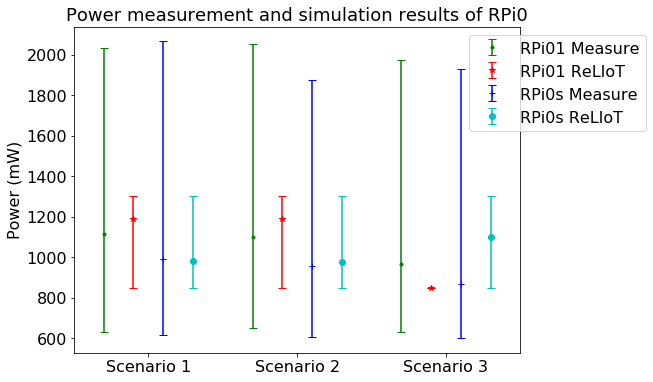

In [122]:
rpi01_m = []
rpi01_m.append([1115.45, 2034.75, 630.48]) # RPi01 scene 1 measure
rpi01_m.append([1100.06, 2053.04, 652.43]) # RPi01 scene 2 measure
rpi01_m.append([966.69, 1971.95, 632.31]) # RPi01 scene 3 measure

rpi01_s = []
rpi01_s.append([1187.3989071038251, 1304, 850.0]) # RPi01 scene 1 reliot
rpi01_s.append([1187.3989071038251, 1304, 850.0]) # RPi01 scene 2 reliot
rpi01_s.append([850.0, 850.0, 850.0]) # RPi01 scene 3 reliot ????????

# RPi0s data are copied from 172.27.0.3's data
rpi0s_m = []
rpi0s_m.append([994.10, 2065.24, 616.46]) # RPi0s scene 1 measure
rpi0s_m.append([959.72, 1876.21, 605.48]) # RPi0s scene 2 measure
rpi0s_m.append([869.42, 1929.87, 602.43]) # RPi0s scene 3 measure

rpi0s_s = []
rpi0s_s.append([983.6600478142076, 1304.01, 850.0]) # RPi0s scene 1 reliot
rpi0s_s.append([975.9071448087431, 1304.01, 850.0]) # RPi0s scene 2 reliot
rpi0s_s.append([1101.814289617486, 1304.01, 850.0]) # RPi0s scene 3 reliot ????????

def formalize(data):
    '''
    generate mean, high/low error from [mean, max, min] statistics
    '''
    data = np.array(data)
    mean = data[:, 0]
    higherr = data[:, 1] - data[:, 0]
    lowerr = data[:, 0] - data[:, 2]
    return mean, higherr, lowerr

rpi01_m_mean, rpi01_m_higherr, rpi01_m_lowerr = formalize(rpi01_m)
rpi01_s_mean, rpi01_s_higherr, rpi01_s_lowerr = formalize(rpi01_s)
rpi0s_m_mean, rpi0s_m_higherr, rpi0s_m_lowerr = formalize(rpi0s_m)
rpi0s_s_mean, rpi0s_s_higherr, rpi0s_s_lowerr = formalize(rpi0s_s)

fig = plt.figure(figsize=(8,6))
ax = plt.gca()
x_pos = range(3)
x_rpi01_m = [x-0.3 for x in x_pos]
x_rpi01_s = [x-0.1 for x in x_pos]
x_rpi0s_m = [x+0.1 for x in x_pos]
x_rpi0s_s = [x+0.3 for x in x_pos]
ax.errorbar(x_rpi01_m, rpi01_m_mean, yerr=[rpi01_m_lowerr, rpi01_m_higherr], \
            fmt='g.', ecolor='g', elinewidth=1.5, capsize=4, label='RPi01 Measure')
ax.errorbar(x_rpi01_s, rpi01_s_mean, yerr=[rpi01_s_lowerr, rpi01_s_higherr], \
            fmt='r*', ecolor='r', elinewidth=1.5, capsize=4, label='RPi01 ReLIoT')
ax.errorbar(x_rpi0s_m, rpi0s_m_mean, yerr=[rpi0s_m_lowerr, rpi0s_m_higherr], \
            fmt='b+', ecolor='b', elinewidth=1.5, capsize=4, label='RPi0s Measure')
ax.errorbar(x_rpi0s_s, rpi0s_s_mean, yerr=[rpi0s_s_lowerr, rpi0s_s_higherr], \
            fmt='co', ecolor='c', elinewidth=1.5, capsize=4, label='RPi0s ReLIoT')

plt.xticks(np.arange(3), ['Scenario 1', 'Scenario 2', 'Scenario 3'], fontsize=16)
plt.xlim(left=-0.5, right=2.5)
plt.ylabel("Power (mW)", fontsize=16)
plt.yticks(fontsize=16)
plt.title("Power measurement and simulation results of RPi0", fontsize=18)
lgd = ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.00), fontsize=16, facecolor='white')

plt.savefig('./power.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')

### Plot temperature error bar in each scenario

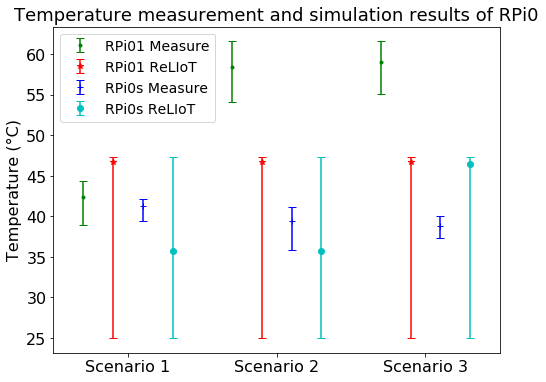

In [123]:
rpi01_m = []
rpi01_m.append([42.46, 44.4, 39.0]) # RPi01 scene 1 measure
rpi01_m.append([58.39, 61.6, 54.1]) # RPi01 scene 2 measure
rpi01_m.append([59.12, 61.6, 55.1]) # RPi01 scene 3 measure

rpi01_s = []
rpi01_s.append([46.707199043715846, 47.3277, 25.0]) # RPi01 scene 1 reliot
rpi01_s.append([46.707199043715846, 47.3277, 25.0]) # RPi01 scene 2 reliot boom????????
rpi01_s.append([46.707199043715846, 47.3277, 25.0]) # RPi01 scene 3 reliot 25????????

# RPi0s data are copied from 172.27.0.3's data
rpi0s_m = []
rpi0s_m.append([41.26, 42.2, 39.5]) # RPi0s scene 1 measure
rpi0s_m.append([39.42, 41.2, 35.8]) # RPi0s scene 2 measure
rpi0s_m.append([38.79, 40.1, 37.4]) # RPi0s scene 3 measure

rpi0s_s = []
rpi0s_s.append([35.70873852459017, 47.3278, 25.0]) # RPi0s scene 1 reliot 25?????
rpi0s_s.append([35.70873852459017, 47.3278, 25.0]) # RPi0s scene 2 reliot
rpi0s_s.append([46.417477049180334, 47.3278, 25.0]) # RPi0s scene 3 reliot


rpi01_m_mean, rpi01_m_higherr, rpi01_m_lowerr = formalize(rpi01_m)
rpi01_s_mean, rpi01_s_higherr, rpi01_s_lowerr = formalize(rpi01_s)
rpi0s_m_mean, rpi0s_m_higherr, rpi0s_m_lowerr = formalize(rpi0s_m)
rpi0s_s_mean, rpi0s_s_higherr, rpi0s_s_lowerr = formalize(rpi0s_s)

fig = plt.figure(figsize=(8,6))
ax = plt.gca()
x_pos = range(3)
x_rpi01_m = [x-0.3 for x in x_pos]
x_rpi01_s = [x-0.1 for x in x_pos]
x_rpi0s_m = [x+0.1 for x in x_pos]
x_rpi0s_s = [x+0.3 for x in x_pos]
ax.errorbar(x_rpi01_m, rpi01_m_mean, yerr=[rpi01_m_lowerr, rpi01_m_higherr], \
            fmt='g.', ecolor='g', elinewidth=1.5, capsize=4, label='RPi01 Measure')
ax.errorbar(x_rpi01_s, rpi01_s_mean, yerr=[rpi01_s_lowerr, rpi01_s_higherr], \
            fmt='r*', ecolor='r', elinewidth=1.5, capsize=4, label='RPi01 ReLIoT')
ax.errorbar(x_rpi0s_m, rpi0s_m_mean, yerr=[rpi0s_m_lowerr, rpi0s_m_higherr], \
            fmt='b+', ecolor='b', elinewidth=1.5, capsize=4, label='RPi0s Measure')
ax.errorbar(x_rpi0s_s, rpi0s_s_mean, yerr=[rpi0s_s_lowerr, rpi0s_s_higherr], \
            fmt='co', ecolor='c', elinewidth=1.5, capsize=4, label='RPi0s ReLIoT')

plt.xticks(np.arange(3), ['Scenario 1', 'Scenario 2', 'Scenario 3'], fontsize=16)
plt.xlim(left=-0.5, right=2.5)
plt.ylabel("Temperature (°C)", fontsize=16)
plt.yticks(fontsize=16)
plt.title("Temperature measurement and simulation results of RPi0", fontsize=18)
ax.legend(loc='upper left', bbox_to_anchor=(0, 1.00), fontsize=14, facecolor='white')

plt.savefig('./temp.png', dpi=300)

### Plot reliability curve

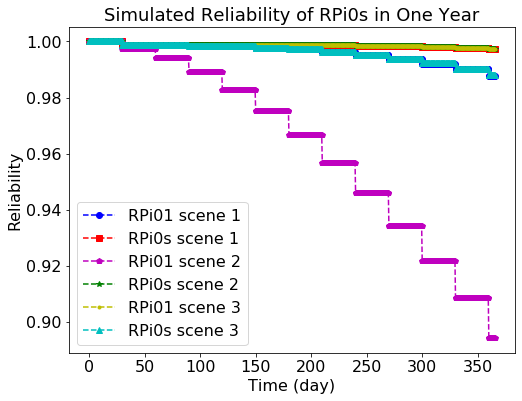

In [124]:
fig = plt.figure(figsize=(8,6))
t = rpi01[:, t_idx]
plt.plot(t, rel_rpi01_s1, 'b--o', label='RPi01 scene 1') # b--o
plt.plot(t, rel_rpi0s_s1, 'r--s', label='RPi0s scene 1') # r--s
plt.plot(t, rel_rpi01_s2, 'm--p', label='RPi01 scene 2') # m--p
plt.plot(t, rel_rpi0s_s2, 'g--*', label='RPi0s scene 2') # c--*
plt.plot(t, rel_rpi01_s3, 'y--.', label='RPi01 scene 3') # y--v
plt.plot(t, rel_rpi0s_s3, 'c--^', label='RPi0s scene 3') # g--^

plt.legend(fontsize=16)
plt.xlabel("Time (day)", fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel("Reliability", fontsize=16)
plt.yticks(fontsize=16)
plt.title("Simulated Reliability of RPi0s in One Year", fontsize=18)

plt.savefig('./rel.png', dpi=300)